Attribute Information:

 ## age
## sex
## chest pain type (4 values)
## resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [240]:
import pandas as pd
import numpy as np
from pycaret.classification import*
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [241]:
df=pd.read_csv('heart.csv',encoding='windows-1252')

In [242]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Clean the Data

In [243]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [244]:
df.dropna(inplace=True)

In [245]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [247]:
x=df.drop(['target'],axis=1)
y=df['target']

In [248]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.25)

In [250]:
model =setup(data=X_train,target=y_train)

,Description,Value
0,Session id,4353
1,Target,target
2,Target type,Binary
3,Original data shape,"(768, 14)"
4,Transformed data shape,"(768, 14)"
5,Transformed train set shape,"(537, 14)"
6,Transformed test set shape,"(231, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [254]:
model=compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9462,0.9901,0.9617,0.9414,0.9502,0.8916,0.8946,0.0240
et,Extra Trees Classifier,0.9443,0.9920,0.9581,0.9423,0.9489,0.8877,0.8907,0.0230
lightgbm,Light Gradient Boosting Machine,0.9331,0.9727,0.9406,0.9366,0.9373,0.8654,0.8682,0.0730
xgboost,Extreme Gradient Boosting,0.9330,0.9705,0.9441,0.9339,0.9375,0.8653,0.8686,0.0260
dt,Decision Tree Classifier,0.9312,0.9301,0.9479,0.9274,0.9359,0.8616,0.8653,0.0050
gbc,Gradient Boosting Classifier,0.9256,0.9685,0.9337,0.9299,0.9303,0.8505,0.8537,0.0160
ada,Ada Boost Classifier,0.8827,0.9458,0.8985,0.8838,0.8899,0.7643,0.7668,0.0130
lr,Logistic Regression,0.8399,0.9160,0.8951,0.8225,0.8560,0.6765,0.6825,0.0140
ridge,Ridge Classifier,0.8344,0.9158,0.9092,0.8071,0.8538,0.6643,0.6738,0.0070
lda,Linear Discriminant Analysis,0.8344,0.9158,0.9092,0.8071,0.8538,0.6643,0.6738,0.0050


In [255]:
y_pred =model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9766536964980544


In [256]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       140
           1       0.97      0.97      0.97       117

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



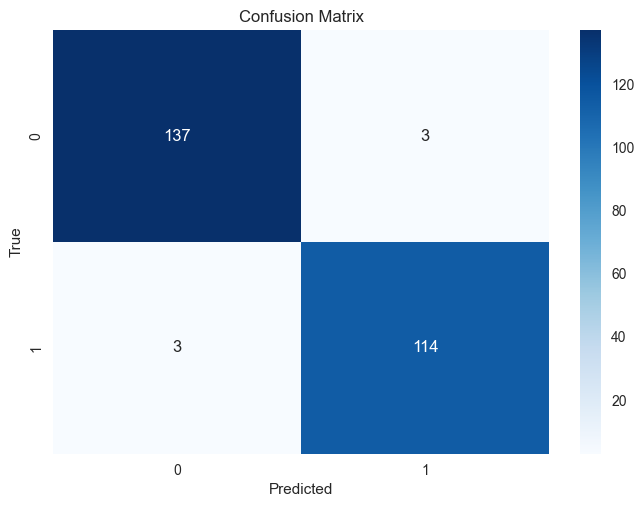

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [258]:
create_api(model,api_name='api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python api.py
